In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.externals import joblib
%matplotlib inline
import seaborn as sns

In [2]:
X = pd.read_csv('application_train.csv')
X.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [4]:
X['DAYS_EMPLOYED'].head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

In [5]:
X.loc[X['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [6]:
X['ORGANIZATION_TYPE'].head(15)

0     Business Entity Type 3
1                     School
2                 Government
3     Business Entity Type 3
4                   Religion
5                      Other
6     Business Entity Type 3
7                      Other
8                        XNA
9                Electricity
10                  Medicine
11                       XNA
12    Business Entity Type 2
13             Self-employed
14         Transport: type 2
Name: ORGANIZATION_TYPE, dtype: object

In [7]:

sum(X['ORGANIZATION_TYPE'] == 'XNA')

55374

In [8]:
X['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [9]:
X['CODE_GENDER'].replace('XNA',np.nan, inplace=True)
X['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [10]:
X['DAYS_LAST_PHONE_CHANGE'].head(20)

0    -1134.0
1     -828.0
2     -815.0
3     -617.0
4    -1106.0
5    -2536.0
6    -1562.0
7    -1070.0
8        0.0
9    -1673.0
10    -844.0
11   -2396.0
12   -2370.0
13      -4.0
14    -188.0
15    -925.0
16      -3.0
17   -2811.0
18    -239.0
19   -1850.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [11]:
X['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)

In [12]:
X['annuity_income_percentage'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
X['car_to_birth_ratio'] = X['OWN_CAR_AGE'] / X['DAYS_BIRTH']
X['car_to_employ_ratio'] = X['OWN_CAR_AGE'] / X['DAYS_EMPLOYED']
X['children_ratio'] = X['CNT_CHILDREN'] / X['CNT_FAM_MEMBERS']
X['credit_to_annuity_ratio'] = X['AMT_CREDIT'] / X['AMT_ANNUITY']
X['credit_to_goods_ratio'] = X['AMT_CREDIT'] / X['AMT_GOODS_PRICE']
X['credit_to_income_ratio'] = X['AMT_CREDIT'] / X['AMT_INCOME_TOTAL']
X['days_employed_percentage'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
X['income_credit_percentage'] = X['AMT_INCOME_TOTAL'] / X['AMT_CREDIT']
X['income_per_child'] = X['AMT_INCOME_TOTAL'] / (1 + X['CNT_CHILDREN'])
X['income_per_person'] = X['AMT_INCOME_TOTAL'] / X['CNT_FAM_MEMBERS']
X['payment_rate'] = X['AMT_ANNUITY'] / X['AMT_CREDIT']
X['phone_to_birth_ratio'] = X['DAYS_LAST_PHONE_CHANGE'] / X['DAYS_BIRTH']
X['phone_to_employ_ratio'] = X['DAYS_LAST_PHONE_CHANGE'] / X['DAYS_EMPLOYED']

In [13]:
X['annuity_income_percentage'].head()

0    0.121978
1    0.132217
2    0.100000
3    0.219900
4    0.179963
Name: annuity_income_percentage, dtype: float64

In [14]:
# External sources
X['external_sources_weighted'] = X.EXT_SOURCE_1 * 2 + X.EXT_SOURCE_2 * 3 + X.EXT_SOURCE_3 * 4
for function_name in ['min', 'max', 'sum', 'mean', 'nanmedian']:
    X['external_sources_{}'.format(function_name)] = eval('np.{}'.format(function_name))(X[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

C:\Users\Umesh.k\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [15]:
'''X['EXT_SOURCE_1'].head() ,''' 
X['external_sources_weighted'].head(30)
print(X['external_sources_min'].head())
X[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].head()

0    0.083037
1    0.311267
2    0.555912
3    0.650442
4    0.322738
Name: external_sources_min, dtype: float64


,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN


In [16]:
engineered_numerical_columns = ['annuity_income_percentage',
                                'car_to_birth_ratio',
                                'car_to_employ_ratio',
                                'children_ratio',
                                'credit_to_annuity_ratio',
                                'credit_to_goods_ratio',
                                'credit_to_income_ratio',
                                'days_employed_percentage',
                                'income_credit_percentage',
                                'income_per_child',
                                'income_per_person',
                                'payment_rate',
                                'phone_to_birth_ratio',
                                'phone_to_employ_ratio',
                                'external_sources_weighted',
                                'external_sources_min',
                                'external_sources_max',
                                'external_sources_sum',
                                'external_sources_mean',
                                'external_sources_nanmedian']

In [17]:
engineered_numerical_columns

['annuity_income_percentage',
 'car_to_birth_ratio',
 'car_to_employ_ratio',
 'children_ratio',
 'credit_to_annuity_ratio',
 'credit_to_goods_ratio',
 'credit_to_income_ratio',
 'days_employed_percentage',
 'income_credit_percentage',
 'income_per_child',
 'income_per_person',
 'payment_rate',
 'phone_to_birth_ratio',
 'phone_to_employ_ratio',
 'external_sources_weighted',
 'external_sources_min',
 'external_sources_max',
 'external_sources_sum',
 'external_sources_mean',
 'external_sources_nanmedian']

In [18]:
X_eng = X[engineered_numerical_columns + ['TARGET']]
X_eng_corr = abs(X_eng.corr())
X_eng.head()
X_eng_corr


,annuity_income_percentage,car_to_birth_ratio,car_to_employ_ratio,children_ratio,credit_to_annuity_ratio,credit_to_goods_ratio,credit_to_income_ratio,days_employed_percentage,income_credit_percentage,income_per_child,...,payment_rate,phone_to_birth_ratio,phone_to_employ_ratio,external_sources_weighted,external_sources_min,external_sources_max,external_sources_sum,external_sources_mean,external_sources_nanmedian,TARGET
annuity_income_percentage,1.000000,0.013019,0.000220,0.016683,0.063912,0.005755,0.788113,0.081888,0.387561,0.200620,...,0.029720,0.006031,0.000235,0.069680,0.046660,0.009189,0.010469,0.033440,0.030805,0.014265
car_to_birth_ratio,0.013019,1.000000,0.295070,0.056806,0.076023,0.053345,0.027081,0.075922,0.009041,0.115626,...,0.054507,0.054655,0.018680,0.159087,0.125818,0.133324,0.103995,0.151474,0.148247,0.048824
car_to_employ_ratio,0.000220,0.295070,1.000000,0.020379,0.028526,0.025589,0.015238,0.078362,0.004249,0.035243,...,0.019189,0.004912,0.415155,0.090557,0.052432,0.058858,0.050263,0.064716,0.063101,0.030553
children_ratio,0.016683,0.056806,0.020379,1.000000,0.032109,0.026135,0.029776,0.250265,0.019001,0.283460,...,0.024508,0.124254,0.034002,0.078357,0.078429,0.042267,0.021151,0.070529,0.066063,0.021223
credit_to_annuity_ratio,0.063912,0.076023,0.028526,0.032109,1.000000,0.123147,0.599189,0.026176,0.323342,0.056196,...,0.912360,0.020788,0.006758,0.101723,0.067999,0.078522,0.081868,0.085392,0.084956,0.032102
credit_to_goods_ratio,0.005755,0.053345,0.025589,0.026135,0.123147,1.000000,0.071923,0.007048,0.061385,0.036678,...,0.137531,0.006848,0.005088,0.067156,0.058163,0.060376,0.063260,0.069127,0.068230,0.069427
credit_to_income_ratio,0.788113,0.027081,0.015238,0.029776,0.599189,0.071923,1.000000,0.081326,0.425804,0.137040,...,0.522148,0.004431,0.003825,0.107718,0.069472,0.048281,0.035981,0.069206,0.066985,0.007727
days_employed_percentage,0.081888,0.075922,0.078362,0.250265,0.026176,0.007048,0.081326,1.000000,0.037225,0.018259,...,0.024697,0.171547,0.093916,0.146023,0.094614,0.055408,0.031402,0.087046,0.080915,0.042206
income_credit_percentage,0.387561,0.009041,0.004249,0.019001,0.323342,0.061385,0.425804,0.037225,1.000000,0.641883,...,0.340344,0.006543,0.000781,0.038209,0.032856,0.018846,0.013623,0.031042,0.030816,0.001817
income_per_child,0.200620,0.115626,0.035243,0.283460,0.056196,0.036678,0.137040,0.018259,0.641883,1.000000,...,0.044444,0.017979,0.009914,0.032222,0.048112,0.068400,0.060769,0.066701,0.065311,0.012529


In [19]:
X_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                        1.000000
external_sources_weighted     0.236289
external_sources_mean         0.222052
external_sources_nanmedian    0.218118
external_sources_max          0.196876
external_sources_min          0.185266
external_sources_sum          0.173322
credit_to_goods_ratio         0.069427
car_to_birth_ratio            0.048824
days_employed_percentage      0.042206
credit_to_annuity_ratio       0.032102
car_to_employ_ratio           0.030553
phone_to_birth_ratio          0.029550
children_ratio                0.021223
annuity_income_percentage     0.014265
payment_rate                  0.012704
income_per_child              0.012529
credit_to_income_ratio        0.007727
phone_to_employ_ratio         0.006714
income_per_person             0.006571
income_credit_percentage      0.001817
Name: TARGET, dtype: float64

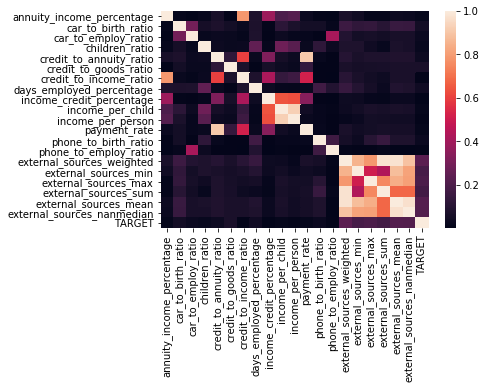

In [20]:
sns.heatmap(X_eng_corr, 
            xticklabels=X_eng_corr.columns,
            yticklabels=X_eng_corr.columns)

In [21]:
AGGREGATION_RECIPIES = [
    (['CODE_GENDER', 'NAME_EDUCATION_TYPE'], [('AMT_ANNUITY', 'max'),
                                              ('AMT_CREDIT', 'max'),
                                              ('EXT_SOURCE_1', 'mean'),
                                              ('EXT_SOURCE_2', 'mean'),
                                              ('OWN_CAR_AGE', 'max'),
                                              ('OWN_CAR_AGE', 'sum')]),
    (['CODE_GENDER', 'ORGANIZATION_TYPE'], [('AMT_ANNUITY', 'mean'),
                                            ('AMT_INCOME_TOTAL', 'mean'),
                                            ('DAYS_REGISTRATION', 'mean'),
                                            ('EXT_SOURCE_1', 'mean')]),
    (['CODE_GENDER', 'REG_CITY_NOT_WORK_CITY'], [('AMT_ANNUITY', 'mean'),
                                                 ('CNT_CHILDREN', 'mean'),
                                                 ('DAYS_ID_PUBLISH', 'mean')]),
    (['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'REG_CITY_NOT_WORK_CITY'], [('EXT_SOURCE_1', 'mean'),
                                                                                           ('EXT_SOURCE_2', 'mean')]),
    (['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'], [('AMT_CREDIT', 'mean'),
                                                  ('AMT_REQ_CREDIT_BUREAU_YEAR', 'mean'),
                                                  ('APARTMENTS_AVG', 'mean'),
                                                  ('BASEMENTAREA_AVG', 'mean'),
                                                  ('EXT_SOURCE_1', 'mean'),
                                                  ('EXT_SOURCE_2', 'mean'),
                                                  ('EXT_SOURCE_3', 'mean'),
                                                  ('NONLIVINGAREA_AVG', 'mean'),
                                                  ('OWN_CAR_AGE', 'mean'),
                                                  ('YEARS_BUILD_AVG', 'mean')]),
    (['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'REG_CITY_NOT_WORK_CITY'], [('ELEVATORS_AVG', 'mean'),
                                                                            ('EXT_SOURCE_1', 'mean')]),
    (['OCCUPATION_TYPE'], [('AMT_ANNUITY', 'mean'),
                           ('CNT_CHILDREN', 'mean'),
                           ('CNT_FAM_MEMBERS', 'mean'),
                           ('DAYS_BIRTH', 'mean'),
                           ('DAYS_EMPLOYED', 'mean'),
                           ('DAYS_ID_PUBLISH', 'mean'),
                           ('DAYS_REGISTRATION', 'mean'),
                           ('EXT_SOURCE_1', 'mean'),
                           ('EXT_SOURCE_2', 'mean'),
                           ('EXT_SOURCE_3', 'mean')]),
]
len(AGGREGATION_RECIPIES)

7

In [22]:
groupby_aggregate_names = []
for groupby_cols, specs in tqdm(AGGREGATION_RECIPIES):
    print(groupby_cols , specs)
    group_object = X.groupby(groupby_cols)
    print(group_object)
    
    for select, agg in tqdm(specs):
        print(select , agg)
        groupby_aggregate_name = '{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
        X = X.merge(group_object[select]
                              .agg(agg)
                              .reset_index()
                              .rename(index=str,
                                      columns={select: groupby_aggregate_name})
                              [groupby_cols + [groupby_aggregate_name]],
                              on=groupby_cols,
                              how='left')
        groupby_aggregate_names.append(groupby_aggregate_name)

['CODE_GENDER', 'NAME_EDUCATION_TYPE'] [('AMT_ANNUITY', 'max'), ('AMT_CREDIT', 'max'), ('EXT_SOURCE_1', 'mean'), ('EXT_SOURCE_2', 'mean'), ('OWN_CAR_AGE', 'max'), ('OWN_CAR_AGE', 'sum')]
AMT_ANNUITY max
AMT_CREDIT max
EXT_SOURCE_1 mean
EXT_SOURCE_2 mean
OWN_CAR_AGE max
OWN_CAR_AGE sum
['CODE_GENDER', 'ORGANIZATION_TYPE'] [('AMT_ANNUITY', 'mean'), ('AMT_INCOME_TOTAL', 'mean'), ('DAYS_REGISTRATION', 'mean'), ('EXT_SOURCE_1', 'mean')]
AMT_ANNUITY mean
AMT_INCOME_TOTAL mean
DAYS_REGISTRATION mean
EXT_SOURCE_1 mean
['CODE_GENDER', 'REG_CITY_NOT_WORK_CITY'] [('AMT_ANNUITY', 'mean'), ('CNT_CHILDREN', 'mean'), ('DAYS_ID_PUBLISH', 'mean')]
AMT_ANNUITY mean
CNT_CHILDREN mean
DAYS_ID_PUBLISH mean
['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'REG_CITY_NOT_WORK_CITY'] [('EXT_SOURCE_1', 'mean'), ('EXT_SOURCE_2', 'mean')]
EXT_SOURCE_1 mean
EXT_SOURCE_2 mean
['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'] [('AMT_CREDIT', 'mean'), ('AMT_REQ_CREDIT_BUREAU_YEAR', 'mean'), ('APARTMENTS_AVG', 'mean

In [23]:
groupby_aggregate_names

['CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY',
 'CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_CREDIT',
 'CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_1',
 'CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_2',
 'CODE_GENDER_NAME_EDUCATION_TYPE_max_OWN_CAR_AGE',
 'CODE_GENDER_NAME_EDUCATION_TYPE_sum_OWN_CAR_AGE',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_ANNUITY',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_INCOME_TOTAL',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_DAYS_REGISTRATION',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_EXT_SOURCE_1',
 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_mean_AMT_ANNUITY',
 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_mean_CNT_CHILDREN',
 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_mean_DAYS_ID_PUBLISH',
 'CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_1',
 'CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_2',
 'NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_AMT_CREDIT',
 'NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_AMT_REQ_CRE

In [24]:
X_agg = X[groupby_aggregate_names + ['TARGET']]
X_agg_corr = abs(X_agg.corr())
print(X[['CODE_GENDER', 'NAME_EDUCATION_TYPE','AMT_ANNUITY']].head(30))
# print(X['CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY'])
X_agg.head()                                              

   CODE_GENDER            NAME_EDUCATION_TYPE  AMT_ANNUITY
0            M  Secondary / secondary special      24700.5
1            F               Higher education      35698.5
2            M  Secondary / secondary special       6750.0
3            F  Secondary / secondary special      29686.5
4            M  Secondary / secondary special      21865.5
5            M  Secondary / secondary special      27517.5
6            F               Higher education      41301.0
7            M               Higher education      42075.0
8            F  Secondary / secondary special      33826.5
9            M  Secondary / secondary special      20250.0
10           F               Higher education      21177.0
11           F  Secondary / secondary special      10678.5
12           F  Secondary / secondary special       5881.5
13           M  Secondary / secondary special      28966.5
14           F  Secondary / secondary special      32778.0
15           M  Secondary / secondary special      20160

,CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY,CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_CREDIT,CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_1,CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_2,CODE_GENDER_NAME_EDUCATION_TYPE_max_OWN_CAR_AGE,CODE_GENDER_NAME_EDUCATION_TYPE_sum_OWN_CAR_AGE,CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_ANNUITY,CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_INCOME_TOTAL,CODE_GENDER_ORGANIZATION_TYPE_mean_DAYS_REGISTRATION,CODE_GENDER_ORGANIZATION_TYPE_mean_EXT_SOURCE_1,...,OCCUPATION_TYPE_mean_CNT_CHILDREN,OCCUPATION_TYPE_mean_CNT_FAM_MEMBERS,OCCUPATION_TYPE_mean_DAYS_BIRTH,OCCUPATION_TYPE_mean_DAYS_EMPLOYED,OCCUPATION_TYPE_mean_DAYS_ID_PUBLISH,OCCUPATION_TYPE_mean_DAYS_REGISTRATION,OCCUPATION_TYPE_mean_EXT_SOURCE_1,OCCUPATION_TYPE_mean_EXT_SOURCE_2,OCCUPATION_TYPE_mean_EXT_SOURCE_3,TARGET
0,173704.5,2961000.0,0.385275,0.496320,91.0,521062.0,29725.858312,208566.954548,-4442.857420,0.401004,...,0.511742,2.276664,-14707.086453,-2424.143152,-2853.826804,-4709.988820,0.422053,0.498419,0.502093,1
1,230161.5,4050000.0,0.578213,0.555785,65.0,171528.0,26463.578694,153236.991435,-4965.608351,0.591029,...,0.558070,2.312223,-14109.967247,-2797.755967,-2750.544868,-4375.710229,0.511520,0.527759,0.494627,0
2,173704.5,2961000.0,0.385275,0.496320,91.0,521062.0,28003.280337,180212.879701,-4677.001719,0.426982,...,0.511742,2.276664,-14707.086453,-2424.143152,-2853.826804,-4709.988820,0.422053,0.498419,0.502093,0
3,216589.5,4027680.0,0.535930,0.503957,65.0,349652.0,28160.113645,175499.426888,-4709.777998,0.520902,...,0.511742,2.276664,-14707.086453,-2424.143152,-2853.826804,-4709.988820,0.422053,0.498419,0.502093,0
4,173704.5,2961000.0,0.385275,0.496320,91.0,521062.0,26599.295455,179284.090909,-4276.931818,0.550301,...,0.558070,2.312223,-14109.967247,-2797.755967,-2750.544868,-4375.710229,0.511520,0.527759,0.494627,0


In [25]:
X_agg = X[groupby_aggregate_names + ['TARGET']]
X_agg_corr = abs(X_agg.corr())
X_agg_corr

,CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY,CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_CREDIT,CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_1,CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_2,CODE_GENDER_NAME_EDUCATION_TYPE_max_OWN_CAR_AGE,CODE_GENDER_NAME_EDUCATION_TYPE_sum_OWN_CAR_AGE,CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_ANNUITY,CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_INCOME_TOTAL,CODE_GENDER_ORGANIZATION_TYPE_mean_DAYS_REGISTRATION,CODE_GENDER_ORGANIZATION_TYPE_mean_EXT_SOURCE_1,...,OCCUPATION_TYPE_mean_CNT_CHILDREN,OCCUPATION_TYPE_mean_CNT_FAM_MEMBERS,OCCUPATION_TYPE_mean_DAYS_BIRTH,OCCUPATION_TYPE_mean_DAYS_EMPLOYED,OCCUPATION_TYPE_mean_DAYS_ID_PUBLISH,OCCUPATION_TYPE_mean_DAYS_REGISTRATION,OCCUPATION_TYPE_mean_EXT_SOURCE_1,OCCUPATION_TYPE_mean_EXT_SOURCE_2,OCCUPATION_TYPE_mean_EXT_SOURCE_3,TARGET
CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY,1.000000,0.910778,0.678058,0.713212,0.602449,0.412400,0.176378,0.224961,0.103172,0.260063,...,0.050150,0.074519,0.071919,0.155164,0.156061,0.153902,0.368153,0.242469,0.106643,0.064214
CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_CREDIT,0.910778,1.000000,0.861563,0.501376,0.766400,0.365190,0.355493,0.455246,0.224810,0.473277,...,0.030083,0.157372,0.106755,0.137944,0.274034,0.118534,0.394305,0.185279,0.154296,0.065357
CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_1,0.678058,0.861563,1.000000,0.444100,0.886690,0.550070,0.466418,0.607371,0.290247,0.622740,...,0.050381,0.179978,0.151329,0.147264,0.342720,0.144993,0.456264,0.203289,0.180760,0.071557
CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_2,0.713212,0.501376,0.444100,1.000000,0.368051,0.653013,0.048612,0.030792,0.080528,0.017134,...,0.127142,0.064786,0.080760,0.190791,0.027435,0.265031,0.388912,0.367988,0.046278,0.063387
CODE_GENDER_NAME_EDUCATION_TYPE_max_OWN_CAR_AGE,0.602449,0.766400,0.886690,0.368051,1.000000,0.735115,0.427882,0.545121,0.270112,0.566644,...,0.034872,0.189867,0.141364,0.140969,0.337415,0.135695,0.439232,0.191989,0.192290,0.067614
CODE_GENDER_NAME_EDUCATION_TYPE_sum_OWN_CAR_AGE,0.412400,0.365190,0.550070,0.653013,0.735115,1.000000,0.139137,0.191764,0.056489,0.234456,...,0.093879,0.042391,0.118998,0.171721,0.165752,0.227633,0.423046,0.306252,0.120096,0.062630
CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_ANNUITY,0.176378,0.355493,0.466418,0.048612,0.427882,0.139137,1.000000,0.920103,0.817890,0.788067,...,0.012075,0.126782,0.053713,0.132541,0.189213,0.008406,0.212734,0.019785,0.109717,0.052333
CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_INCOME_TOTAL,0.224961,0.455246,0.607371,0.030792,0.545121,0.191764,0.920103,1.000000,0.742007,0.806747,...,0.002206,0.171043,0.087595,0.091941,0.276472,0.011630,0.251219,0.023659,0.144091,0.050272
CODE_GENDER_ORGANIZATION_TYPE_mean_DAYS_REGISTRATION,0.103172,0.224810,0.290247,0.080528,0.270112,0.056489,0.817890,0.742007,1.000000,0.882913,...,0.104333,0.164465,0.096256,0.160804,0.014671,0.145811,0.148497,0.019832,0.054990,0.052410
CODE_GENDER_ORGANIZATION_TYPE_mean_EXT_SOURCE_1,0.260063,0.473277,0.622740,0.017134,0.566644,0.234456,0.788067,0.806747,0.882913,1.000000,...,0.009413,0.202275,0.078527,0.180788,0.281304,0.035594,0.385187,0.131676,0.128496,0.070029


In [26]:
X_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                                                      1.000000
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_1                0.089964
CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_2    0.089231
CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_1    0.086677
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_EXT_SOURCE_1                                       0.083520
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_EXT_SOURCE_2                                       0.082742
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_ELEVATORS_AVG               0.078057
OCCUPATION_TYPE_mean_EXT_SOURCE_1                                                           0.076587
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_AMT_REQ_CREDIT_BUREAU_YEAR                         0.074528
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_YEARS_BUILD_AVG                                   

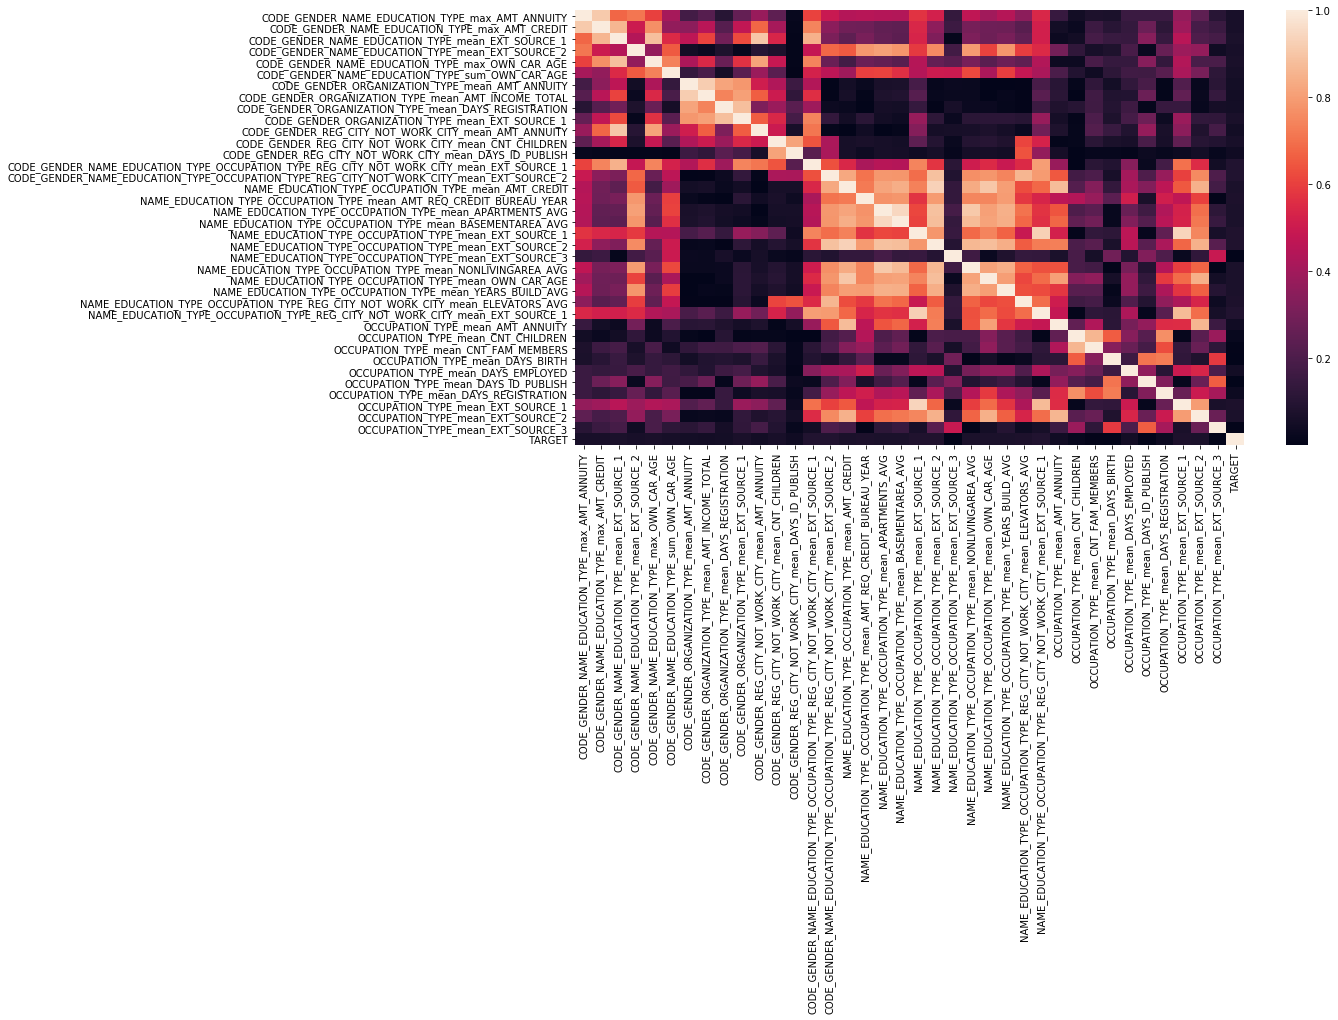

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(X_agg_corr, 
            xticklabels=X_agg_corr.columns,
            yticklabels=X_agg_corr.columns)

In [28]:
diff_feature_names = []
for groupby_cols, specs in tqdm(AGGREGATION_RECIPIES):
    for select, agg in tqdm(specs):
        print(select,agg)
        if agg in ['mean','median','max','min']:
            groupby_aggregate_name = '{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
            diff_name = '{}_diff'.format(groupby_aggregate_name)
            abs_diff_name = '{}_abs_diff'.format(groupby_aggregate_name)

            X[diff_name] = X[select] - X[groupby_aggregate_name] 
            X[abs_diff_name] = np.abs(X[select] - X[groupby_aggregate_name]) 

            diff_feature_names.append(diff_name)
            diff_feature_names.append(abs_diff_name)

AMT_ANNUITY max
AMT_CREDIT max
EXT_SOURCE_1 mean
EXT_SOURCE_2 mean
OWN_CAR_AGE max
OWN_CAR_AGE sum
AMT_ANNUITY mean
AMT_INCOME_TOTAL mean
DAYS_REGISTRATION mean
EXT_SOURCE_1 mean
AMT_ANNUITY mean
CNT_CHILDREN mean
DAYS_ID_PUBLISH mean
EXT_SOURCE_1 mean
EXT_SOURCE_2 mean
AMT_CREDIT mean
AMT_REQ_CREDIT_BUREAU_YEAR mean
APARTMENTS_AVG mean
BASEMENTAREA_AVG mean
EXT_SOURCE_1 mean
EXT_SOURCE_2 mean
EXT_SOURCE_3 mean
NONLIVINGAREA_AVG mean
OWN_CAR_AGE mean
YEARS_BUILD_AVG mean
ELEVATORS_AVG mean
EXT_SOURCE_1 mean
AMT_ANNUITY mean
CNT_CHILDREN mean
CNT_FAM_MEMBERS mean
DAYS_BIRTH mean
DAYS_EMPLOYED mean
DAYS_ID_PUBLISH mean
DAYS_REGISTRATION mean
EXT_SOURCE_1 mean
EXT_SOURCE_2 mean
EXT_SOURCE_3 mean



In [29]:
diff_feature_names

['CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY_diff',
 'CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY_abs_diff',
 'CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_CREDIT_diff',
 'CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_CREDIT_abs_diff',
 'CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_1_diff',
 'CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_1_abs_diff',
 'CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_2_diff',
 'CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_2_abs_diff',
 'CODE_GENDER_NAME_EDUCATION_TYPE_max_OWN_CAR_AGE_diff',
 'CODE_GENDER_NAME_EDUCATION_TYPE_max_OWN_CAR_AGE_abs_diff',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_ANNUITY_diff',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_ANNUITY_abs_diff',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_INCOME_TOTAL_diff',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_INCOME_TOTAL_abs_diff',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_DAYS_REGISTRATION_diff',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_DAYS_REGISTRATION_abs_diff',
 'CODE_GENDER_ORGANIZATION_TYPE_me

In [30]:
X_diff = X[diff_feature_names + ['TARGET']]
X_diff_corr = abs(X_diff.corr())
X_diff_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                                                               1.000000
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_EXT_SOURCE_3_diff                                           0.180676
OCCUPATION_TYPE_mean_EXT_SOURCE_3_diff                                                               0.180197
OCCUPATION_TYPE_mean_EXT_SOURCE_2_diff                                                               0.162917
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_EXT_SOURCE_2_diff                                           0.159719
CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_2_diff        0.157282
CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_2_diff                                               0.153519
CODE_GENDER_ORGANIZATION_TYPE_mean_EXT_SOURCE_1_diff                                                 0.145575
CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_1_diff                                               0.142056
OCCUPATION

In [31]:
X['DAYS_EMPLOYED'].replace(365243,np.nan, inplace=True)

In [32]:
X_clean = X[~pd.isnull(X['DAYS_EMPLOYED'])]
X_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE_mean_DAYS_ID_PUBLISH_diff,OCCUPATION_TYPE_mean_DAYS_ID_PUBLISH_abs_diff,OCCUPATION_TYPE_mean_DAYS_REGISTRATION_diff,OCCUPATION_TYPE_mean_DAYS_REGISTRATION_abs_diff,OCCUPATION_TYPE_mean_EXT_SOURCE_1_diff,OCCUPATION_TYPE_mean_EXT_SOURCE_1_abs_diff,OCCUPATION_TYPE_mean_EXT_SOURCE_2_diff,OCCUPATION_TYPE_mean_EXT_SOURCE_2_abs_diff,OCCUPATION_TYPE_mean_EXT_SOURCE_3_diff,OCCUPATION_TYPE_mean_EXT_SOURCE_3_abs_diff
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,733.826804,733.826804,1061.988820,1061.988820,-0.339016,0.339016,-0.235471,0.235471,-0.362717,0.362717
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2459.544868,2459.544868,3189.710229,3189.710229,-0.200252,0.200252,0.094487,0.094487,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,322.826804,322.826804,449.988820,449.988820,NaN,NaN,0.057493,0.057493,0.227474,0.227474
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,416.826804,416.826804,-5123.011180,5123.011180,NaN,NaN,0.152022,0.152022,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-707.455132,707.455132,64.710229,64.710229,NaN,NaN,-0.205020,0.205020,NaN,NaN


In [33]:
X_clean.dtypes

SK_ID_CURR                                                                                  int64
TARGET                                                                                      int64
NAME_CONTRACT_TYPE                                                                         object
CODE_GENDER                                                                                object
FLAG_OWN_CAR                                                                               object
FLAG_OWN_REALTY                                                                            object
CNT_CHILDREN                                                                                int64
AMT_INCOME_TOTAL                                                                          float64
AMT_CREDIT                                                                                float64
AMT_ANNUITY                                                                               float64
AMT_GOODS_PRICE     

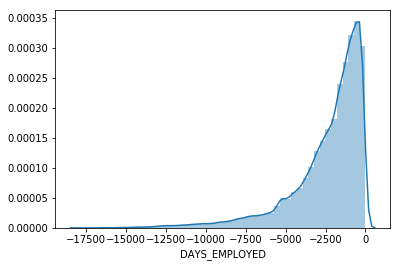

In [34]:
sns.distplot(X_clean['DAYS_EMPLOYED'])

In [35]:
X['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [36]:
X['long_employment'] = (X['DAYS_EMPLOYED'] < -2000).astype(int)
feature_names = ['long_employment']
feature_names

['long_employment']

In [37]:
X_employment = X[feature_names +['DAYS_EMPLOYED'] + ['TARGET']]
X_employment_corr = abs(X_employment.corr())
X_employment_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET             1.000000
DAYS_EMPLOYED      0.074958
long_employment    0.049197
Name: TARGET, dtype: float64

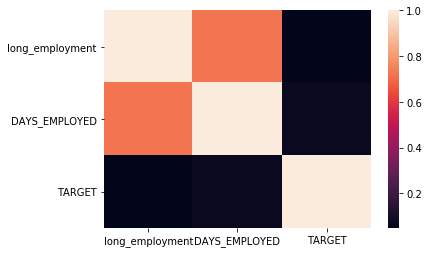

In [38]:
sns.heatmap(X_employment_corr, 
            xticklabels=X_employment_corr.columns,
            yticklabels=X_employment_corr.columns)

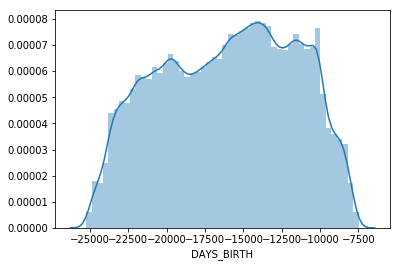

In [39]:
sns.distplot(X['DAYS_BIRTH'])

In [40]:
X['retirement_age'] = (X['DAYS_BIRTH'] < -14000).astype(int)
feature_names = ['DAYS_BIRTH','retirement_age']
X['retirement_age'].head(30)

0     0
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    1
12    0
13    1
14    1
15    0
16    0
17    0
18    1
19    0
20    1
21    1
22    0
23    1
24    0
25    1
26    1
27    1
28    0
29    0
Name: retirement_age, dtype: int32

In [41]:
X_age = X[feature_names + ['DAYS_BIRTH'] + ['TARGET']]
X_age_corr = abs(X_age.corr())
X_age_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET            1.000000
DAYS_BIRTH        0.078239
DAYS_BIRTH        0.078239
retirement_age    0.067615
Name: TARGET, dtype: float64

In [42]:
# X_age = X[feature_names + ['DAYS_BIRTH'] + ['TARGET']]
# X_age_corr = abs(X_age.corr())
# X_age_corr.sort_values('TARGET', ascending=False)['TARGET']

In [43]:

X['cnt_non_child'] = X['CNT_FAM_MEMBERS'] - X['CNT_CHILDREN']
X['child_to_non_child_ratio'] = X['CNT_CHILDREN'] / X['cnt_non_child']
X['income_per_non_child'] = X['AMT_INCOME_TOTAL'] / X['cnt_non_child']
X['credit_per_person'] = X['AMT_CREDIT'] / X['CNT_FAM_MEMBERS']
X['credit_per_child'] = X['AMT_CREDIT'] / (1 + X['CNT_CHILDREN'])
X['credit_per_non_child'] = X['AMT_CREDIT'] / X['cnt_non_child']

In [44]:
feature_names = ['cnt_non_child',
                 'child_to_non_child_ratio',
                 'income_per_non_child',
                 'credit_per_person',
                 'credit_per_child',
                 'credit_per_non_child']

In [45]:
X_family = X[feature_names + ['TARGET']]
X_family_corr = abs(X_family.corr())
X_family_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                      1.000000
credit_per_child            0.033503
credit_per_person           0.023462
child_to_non_child_ratio    0.020943
credit_per_non_child        0.020244
cnt_non_child               0.012195
income_per_non_child        0.001947
Name: TARGET, dtype: float64

In [46]:
X_family.head()

,cnt_non_child,child_to_non_child_ratio,income_per_non_child,credit_per_person,credit_per_child,credit_per_non_child,TARGET
0,1.0,0.0,202500.0,406597.50,406597.5,406597.50,1
1,2.0,0.0,135000.0,646751.25,1293502.5,646751.25,0
2,1.0,0.0,67500.0,135000.00,135000.0,135000.00,0
3,2.0,0.0,67500.0,156341.25,312682.5,156341.25,0
4,1.0,0.0,121500.0,513000.00,513000.0,513000.00,0


In [48]:
selected_columns = X[feature_names + ['DAYS_BIRTH'] + ['retirement_age'] + diff_feature_names + groupby_aggregate_names + ['SK_ID_CURR']]

In [49]:
selected_columns.head()

,cnt_non_child,child_to_non_child_ratio,income_per_non_child,credit_per_person,credit_per_child,credit_per_non_child,DAYS_BIRTH,retirement_age,CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY_diff,CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY_abs_diff,...,OCCUPATION_TYPE_mean_CNT_CHILDREN,OCCUPATION_TYPE_mean_CNT_FAM_MEMBERS,OCCUPATION_TYPE_mean_DAYS_BIRTH,OCCUPATION_TYPE_mean_DAYS_EMPLOYED,OCCUPATION_TYPE_mean_DAYS_ID_PUBLISH,OCCUPATION_TYPE_mean_DAYS_REGISTRATION,OCCUPATION_TYPE_mean_EXT_SOURCE_1,OCCUPATION_TYPE_mean_EXT_SOURCE_2,OCCUPATION_TYPE_mean_EXT_SOURCE_3,SK_ID_CURR
0,1.0,0.0,202500.0,406597.50,406597.5,406597.50,-9461,0,-149004.0,149004.0,...,0.511742,2.276664,-14707.086453,-2424.143152,-2853.826804,-4709.988820,0.422053,0.498419,0.502093,100002
1,2.0,0.0,135000.0,646751.25,1293502.5,646751.25,-16765,1,-194463.0,194463.0,...,0.558070,2.312223,-14109.967247,-2797.755967,-2750.544868,-4375.710229,0.511520,0.527759,0.494627,100003
2,1.0,0.0,67500.0,135000.00,135000.0,135000.00,-19046,1,-166954.5,166954.5,...,0.511742,2.276664,-14707.086453,-2424.143152,-2853.826804,-4709.988820,0.422053,0.498419,0.502093,100004
3,2.0,0.0,67500.0,156341.25,312682.5,156341.25,-19005,1,-186903.0,186903.0,...,0.511742,2.276664,-14707.086453,-2424.143152,-2853.826804,-4709.988820,0.422053,0.498419,0.502093,100006
4,1.0,0.0,121500.0,513000.00,513000.0,513000.00,-19932,1,-151839.0,151839.0,...,0.558070,2.312223,-14109.967247,-2797.755967,-2750.544868,-4375.710229,0.511520,0.527759,0.494627,100007


In [50]:
selected_columns.to_csv("df_application",index=False)